<a href="https://colab.research.google.com/github/tejashreemore/Petrol-Price-Forecasting/blob/main/lstm_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("/content/train_data.csv")
data.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
data=data[data.Petrol<160].reset_index()['Petrol'] #remove outlier refer to data_analysis.ipynb
data.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [3]:

scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(data).reshape(-1,1))
df[:10]

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888]])

In [4]:
df.shape

(809, 1)

In [5]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [6]:
print(train_data.shape)
print(test_data.shape)

(525, 1)
(284, 1)


**Data Preprocessing**

In [7]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
# Example

# train data                              test data
# 120,125,115,119,130,...                 132,115,142,165,...

# time step = 3

# dataX             dataY                (same will happen with test data)
# f1   f2   f3      output
# 120  125  115     119
# 125  115  119     130
# .                  .
# .                  .

In [9]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
X_train

array([[[0.00559152],
        [0.00382578],
        [0.00309005],
        ...,
        [0.16627428],
        [0.16524426],
        [0.1640671 ]],

       [[0.00382578],
        [0.00309005],
        [0.00206004],
        ...,
        [0.16524426],
        [0.1640671 ],
        [0.16274279]],

       [[0.00309005],
        [0.00206004],
        [0.00103002],
        ...,
        [0.1640671 ],
        [0.16274279],
        [0.15538552]],

       ...,

       [[0.91024132],
        [0.91597999],
        [0.90847557],
        ...,
        [0.88419659],
        [0.88655091],
        [0.88743378]],

       [[0.91597999],
        [0.90847557],
        [0.88802237],
        ...,
        [0.88655091],
        [0.88743378],
        [0.87154208]],

       [[0.90847557],
        [0.88802237],
        [0.88449088],
        ...,
        [0.88743378],
        [0.87154208],
        [0.87639788]]])

In [12]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [13]:
print(X_train.shape)
print(y_train.shape)

(424, 100, 1)
(424,)


# LSTM

In [14]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
X_train.shape

(424, 100, 1)

In [17]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 197ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 2/100
7/7 [==============================] - 1s 186ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 3/100
7/7 [==============================] - 1s 184ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/100
7/7 [==============================] - 1s 185ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
7/7 [==============================] - 1s 189ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
7/7 [==============================] - 1s 220ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/100
7/7 [==============================] - 3s 377ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 8/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/100
7/7 [==============================] - 2s 251ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 10/100
7/7 [==============================] - 1s 194ms/step - loss: 0.0015 - val_loss: 9.8704e-04
Epoch

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 36ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

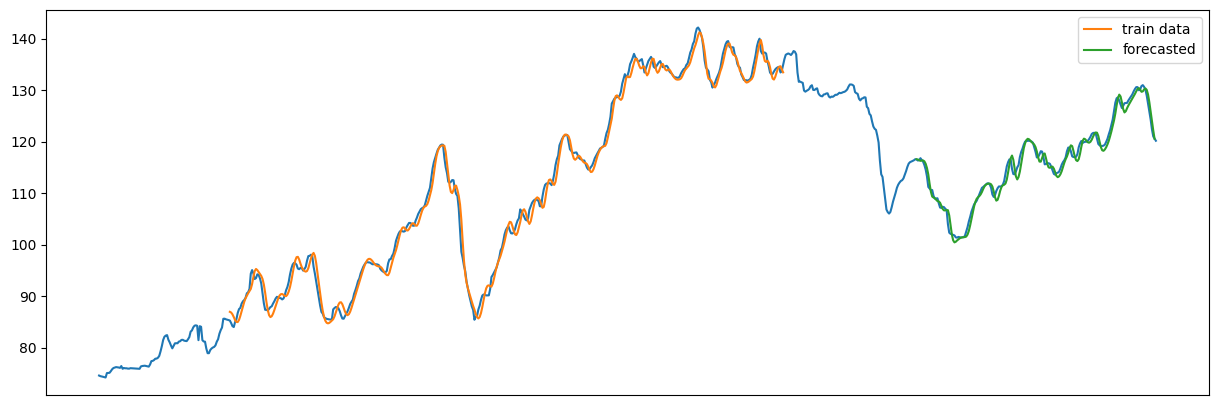

In [ ]:
### Plotting
# shift train predictions for plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label = "train data")
plt.plot(testPredictPlot,label = "forecasted")
plt.legend()
plt.xticks([])

plt.show()

In [ ]:
model.save("petrol price prediction")